In [2]:
import pandas as pd
import numpy as np

In [5]:
pd.options.display.max_columns = 1000

In [64]:
aps = pd.read_csv('APS_FINAL_DATA_en.csv')

In [65]:
aps.head() 

,Unnamed: 0,AC1,AS2,q1,q2,q7.,q8,q18a,q18b,q18c,q18d,q18e,q18f,q19,q20a,q20b,q20c,q20d,q20e,q20f,q20g,q20h,q20i,q21a,q21b,q21c,q21d,q21e,q21f,q21g,q21h,q21i,q21j,q24m,q24o,q24p,q30,q31,q32,q33,q34a,q34b,q35a,q35b,q35c,q35d,q35e,q35f,q35g,q36a,q36b,q37a,q37b,q37c,q37d,q37e,q37f,q37g,q37h,q37i,q37j,q37k,q37l,q53b,q53c,q58a,q58b,q58c,q58d,q58e,q58f,q58g,q58h,q58i,q58j,q59,q60,q64c,q67c,q67d,q67e,JobEngagement,TeamEngagement,SprvisrEngagement,AgencyEngagement
0,1,Larger operational,Large (1001 or more),Male,45 to 49 years,EL/SES,10 to less than 15 years,2,2,2,2,2,2,1 to 2 employees,3,4,3,3,2,3,3,2,2,4,4,3,4,4,4,3,3,3,3,3,3,2,Yes,80 to less than 90 hours,3,3,Yes,No,3,4,4,3,3,3,4,Two,About three quarters of the time,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,3,3,3,3,3,3,3,3,Senior Executive Service Band 1 (or equivalent),Yes,2,2,2,2,5.00,6.25,3.75,4.375
1,2,Larger operational,Large (1001 or more),Male,40 to 44 years,Trainee/Grad/APS,5 to less than 10 years,2,4,3,2,2,4,6 to 10 employees,4,5,4,2,2,2,4,4,4,5,5,5,5,5,4,4,4,3,4,4,5,4,Yes,75 hours or less,2,2,No,No,4,3,4,4,3,2,4,Two,All of the time,4,4,4,4,4,5,4,4,5,2,5,2,5,5,4,5,4,5,5,5,5,5,5,5,Executive Level 1 (or equivalent),No,4,4,5,4,1.25,1.25,2.50,1.875
2,3,Larger operational,Large (1001 or more),Female,40 to 44 years,Trainee/Grad/APS,5 to less than 10 years,2,4,3,3,3,3,6 to 10 employees,3,3,3,3,2,2,2,2,3,1,3,2,2,3,2,3,3,2,3,4,3,2,Yes,80 to less than 90 hours,4,4,Yes,No,4,2,3,3,3,3,3,One,All of the time,2,2,3,3,3,3,3,3,3,3,3,2,4,4,2,4,2,2,2,2,3,3,4,3,Executive Level 1 (or equivalent),Not sure,3,3,2,3,5.00,3.75,5.00,5.000
3,4,Smaller operational,Medium (251 to 1000),Male,50 to 54 years,EL/SES,10 to less than 15 years,1,1,1,1,1,1,11 or more employees,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,2,3,3,2,Yes,100 to less than 120 hours,4,2,No,No,2,1,1,1,5,1,2,One,All of the time,2,2,2,1,1,2,2,4,2,2,4,2,2,2,1,2,1,1,2,2,1,1,2,1,Senior Executive Service Band 1 (or equivalent),Yes,2,1,1,1,10.00,10.00,10.00,8.750
4,5,Specialist,Small (less than 251 employees),Male,30 to 34 years,EL/SES,5 to less than 10 years,2,4,4,2,2,3,6 to 10 employees,3,2,4,4,2,2,2,2,3,4,4,5,4,5,3,2,4,5,4,4,4,3,Yes,More than 75 hours to less than 80 hours,4,3,No,No,3,3,4,3,1,2,4,One,About one quarter of the time,5,3,5,5,5,5,5,5,3,5,4,5,3,4,2,4,4,2,2,4,4,4,5,5,Executive Level 2 (or equivalent),Yes,2,4,4,2,7.50,3.75,3.75,3.125


In [70]:
# from sklearn.preprocessing import LabelEncoder
# coll=aps.columns
# num_coll=len(coll)
# print("Total columns in dataset:",num_coll)

In [71]:
# class MultiColumnLabelEncoder:
#     def __init__(self,columns = None):
#         self.columns = columns 
#     def fit(self,X,y=None):
#         return self 
#     def transform(self,X):
#         output = X.copy()
#         if self.columns is not None:
#             for col in self.columns:
#                 output[col] = LabelEncoder().fit_transform(output[col])
#         else:
#             for colname,col in output.iteritems():
#                 output[colname] = LabelEncoder().fit_transform(col)
#         return output
#     def fit_transform(self,X,y=None):
#         return self.fit(X,y).transform(X)
# encode_aps=MultiColumnLabelEncoder(coll).fit_transform(aps)

In [72]:
# encode_aps = encode_aps.iloc[:,:-4]

In [74]:
from scipy.stats import zscore


In [75]:
# #24(m,o),53(bc),58(all),64c,67cde
efa_aps = aps[["q24m", "q24o","q53b", "q53c", "q58a", "q58b", "q58c", "q58d", "q58e", "q58f", "q58g", "q58h", "q58i", "q58j","q64c", "q67c","q67d", "q67e"]]

In [76]:
efa_aps

,q24m,q24o,q53b,q53c,q58a,q58b,q58c,q58d,q58e,q58f,q58g,q58h,q58i,q58j,q64c,q67c,q67d,q67e
0,3,3,4,4,3,3,3,3,3,3,3,3,3,3,2,2,2,2
1,4,5,5,5,4,5,4,5,5,5,5,5,5,5,4,4,5,4
2,4,3,4,4,2,4,2,2,2,2,3,3,4,3,3,3,2,3
3,3,3,2,2,1,2,1,1,2,2,1,1,2,1,2,1,1,1
4,4,4,3,4,2,4,4,2,2,4,4,4,5,5,2,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13060,4,3,2,3,2,2,2,2,2,2,2,2,4,3,2,2,2,2
13061,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2
13062,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
13063,3,2,2,2,1,1,1,1,1,1,1,1,1,1,3,3,3,3


In [77]:
efa_aps_z =efa_aps.apply(zscore)

In [78]:
efa_aps_z.head()

,q24m,q24o,q53b,q53c,q58a,q58b,q58c,q58d,q58e,q58f,q58g,q58h,q58i,q58j,q64c,q67c,q67d,q67e
0,-0.053026,0.104801,1.397248,1.231693,0.813360,0.646692,0.765119,0.656484,0.608029,0.663180,0.464400,0.498029,0.469903,0.679260,-0.498614,-0.229768,-0.762936,-0.536956
1,0.958337,2.048345,2.381771,2.193217,1.839981,2.480647,1.706566,2.548390,2.412844,2.585835,2.216968,2.314541,2.224985,2.599322,1.759408,1.890983,2.219638,1.374057
2,0.958337,0.104801,1.397248,1.231693,-0.213261,1.563669,-0.176328,-0.289470,-0.294379,-0.298148,0.464400,0.498029,1.347444,0.679260,0.630397,0.830607,-0.762936,0.418550
3,-0.053026,0.104801,-0.571800,-0.691355,-1.239881,-0.270286,-1.117774,-1.235423,-0.294379,-0.298148,-1.288168,-1.318483,-0.407638,-1.240803,-0.498614,-1.290144,-1.757128,-1.492462
4,0.958337,1.076573,0.412724,1.231693,-0.213261,1.563669,1.706566,-0.289470,-0.294379,1.624507,1.340684,1.406285,2.224985,2.599322,-0.498614,1.890983,1.225447,-0.536956


In [49]:
import matplotlib.pyplot as plt

In [79]:
for col in efa_aps.columns:
    print((abs(efa_aps_z["q24m"])>3.29).sum())
   

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0

<AxesSubplot:>

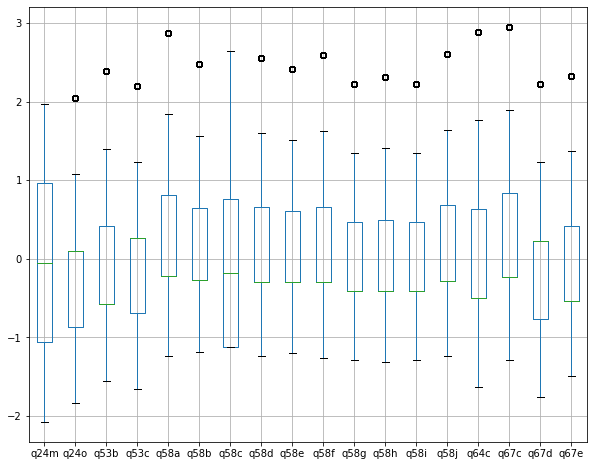

In [86]:
plt.figure(figsize=(10,8))

efa_aps_z.boxplot()

<AxesSubplot:>

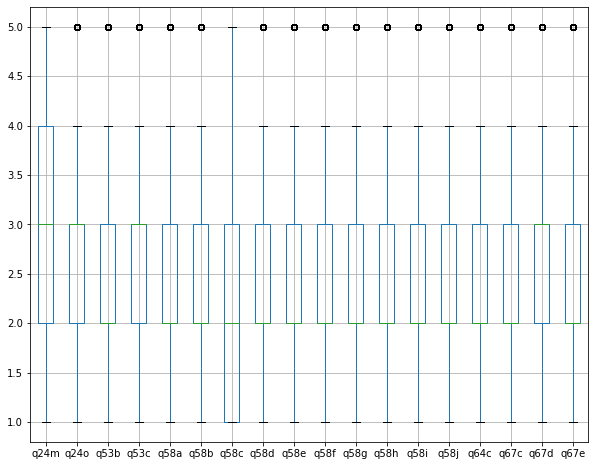

In [88]:
plt.figure(figsize=(10,8))
efa_aps.boxplot()

In [105]:
from scipy.stats import kurtosis, skew
desc = efa_aps.agg([np.mean,np.std]).T

In [106]:
desc

,mean,std
q24m,3.052430,0.988803
q24o,2.892155,1.029087
q53b,2.580788,1.015758
q53c,2.719020,1.040055
q58a,2.207731,0.974107
q58b,2.294757,1.090581
q58c,2.187294,1.062236
q58d,2.306008,1.057175
q58e,2.326215,1.108189
q58f,2.310142,1.040268


In [109]:
desc['skew'] = efa_aps.apply(skew)

In [110]:
desc['kurtosis'] = efa_aps.apply(kurtosis)

In [113]:
desc.to_csv("Descriptive Analysis.csv")

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt

pd.options.display.max_columns = 1000

# read encoded file
aps = pd.read_csv('APS_FINAL_DATA_en.csv')

# variable selection 
efa_aps = aps[["q24m", "q24o","q53b", "q53c", "q58a", "q58b", "q58c", "q58d", "q58e", "q58f", "q58g", "q58h", "q58i", "q58j","q64c", "q67c","q67d", "q67e"]]

# Descriptive Analysis

desc = efa_aps.agg([np.mean,np.std]).T
desc['skew'] = efa_aps.apply(skew)
desc['kurtosis'] = efa_aps.apply(kurtosis)
desc.to_csv("Descriptive Analysis.csv")

# Outlier Detection

efa_aps_z =efa_aps.apply(zscore)
plt.figure(figsize=(10,8))
efa_aps_z.boxplot()
plt.figure(figsize=(10,8))
efa_aps.boxplot()